# NHGRI Sequencing and Genomic Technology Development Portfolio Analysis

NHGRI's Extramural Research Program funds a number of grants to advance the nucleid acid sequencing and genomic technology development. Performing portfolio analyses allows staff to look at how spending is allocated and inform future decisions. Because of the number of analysts performing analyses, there is a diverse way of showing data. This script tries to initiate standardization of performing analysis across the exramural program. Definitely still a work in progress though :) 

In [1]:
#import packages
import pandas as pd
import numpy as np
import scipy as sp
import plotly.plotly as py 
import matplotlib.pyplot as plt
%matplotlib inline

#import excel file and create dataframe called techdev
excel_file = "TechDevApps2011-2017.xlsx"
techdev = pd.read_excel(excel_file)

#view techdev_xls tabs
techdev_sheet1 = pd.read_excel(excel_file, sheetname=0, index_col=0)
techdev_sheet1.head(170)


,RFA Title,Actv,Project,Year Funded,Institution,PI Name,Title,Award Total,Abstract Text (only)
RFA/PA Number,,,,,,,,,
HG11-014,TECHNOLOGY DEVELOPMENT FOR HIGH-THROUGHPUT FUN...,R21,HG006744-01,2012,WASHINGTON UNIVERSITY,"GOTTLIEB, DAVID I",FUNCTIONAL CHARACTERIZATION OF NEURAL GENE PRO...,0,ABSTRACT This grant will utilize ES cells as ...
HG11-013,TECHNOLOGY DEVELOPMENT FOR HIGH-THROUGHPUT FUN...,R01,HG006755-01,2012,ARIZONA STATE UNIVERSITY-TEMPE CAMPUS,"CHAPUT, JOHN CHARLES",Develop a genome-wide approach to identify cis...,0,DESCRIPTION (provided by applicant): The ...
HG11-013,TECHNOLOGY DEVELOPMENT FOR HIGH-THROUGHPUT FUN...,R01,HG006758-01,2012,UNIVERSITY OF WASHINGTON,"DUAN, ZHIJUN",Structural Relationships among DNA Functional ...,0,DESCRIPTION (provided by applicant): Rece...
HG11-013,TECHNOLOGY DEVELOPMENT FOR HIGH-THROUGHPUT FUN...,R01,HG006759-01,2012,DARTMOUTH COLLEGE,"LUPIEN, MATHIEU",New bioinformatics approaches for functional g...,0,PROJECT SUMMARY: Genome-wide association stud...
HG11-013,TECHNOLOGY DEVELOPMENT FOR HIGH-THROUGHPUT FUN...,R01,HG006760-01,2012,YALE UNIVERSITY,"WEISSMAN, SHERMAN MORTON",Genomic scale analyses of single cells expedit...,0,DESCRIPTION (provided by applicant): The ...
HG11-013,TECHNOLOGY DEVELOPMENT FOR HIGH-THROUGHPUT FUN...,R01,HG006762-01,2012,SANGER INSTITUTE,"HUBBARD, TIMOTHY JOHN (contact); CHOUDHARY, JY...",Developing a high-throughput proteomics and ge...,0,Abstract: Developing a high-throughput proteo...
HG11-014,TECHNOLOGY DEVELOPMENT FOR HIGH-THROUGHPUT FUN...,R21,HG006756-01,2012,UNIV OF NORTH CAROLINA CHAPEL HILL,"JANZEN, WILLIAM PERRY",Miniaturization and optimization of FAIRE to i...,0,Project Summary Complex cellular mechanisms ...
HG11-014,TECHNOLOGY DEVELOPMENT FOR HIGH-THROUGHPUT FUN...,R21,HG006757-01,2012,ARIZONA STATE UNIVERSITY-TEMPE CAMPUS,"MANGONE, MARCO",A novel high-throughput method to detect and m...,0,PROJECT SUMMARY/ABSTRACT Three-prime untrans...
HG11-014,TECHNOLOGY DEVELOPMENT FOR HIGH-THROUGHPUT FUN...,R21,HG006761-01,2012,UNIVERSITY OF SOUTHERN CALIFORNIA,"FARNHAM, PEGGY J",Development of a nuclease-mediated technology ...,269997,DESCRIPTION (provided by applicant): Although ...


In [2]:
#view number of applications (rows, columns)
techdev.shape

(170, 10)

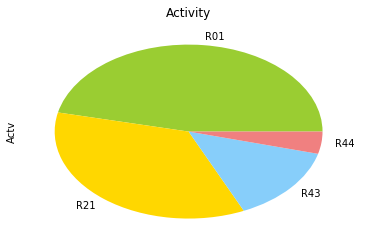

In [3]:
#create pie chart for distribution by activity code
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','red','green','blue','orange','white','brown']
techdev['Actv'].value_counts().plot(kind='pie',title='Activity',colors=colors)
plt.show()

In [4]:
techdev_subset = techdev[['Year Funded', 'Award Total']]
techdev_subset.head(170)

spending_by_year = techdev_subset.pivot_table(index=['Year Funded'])
spending_by_year.head(170)

,Award Total
Year Funded,
2012,77146.811321
2016,118265.652174
2017,126370.872340


In [5]:
#create a subset of table with only year funded, award total, and institution
funding = techdev[['Year Funded','Award Total','Institution']]
funding.head(170)


,Year Funded,Award Total,Institution
0,2012,0,WASHINGTON UNIVERSITY
1,2012,0,ARIZONA STATE UNIVERSITY-TEMPE CAMPUS
2,2012,0,UNIVERSITY OF WASHINGTON
3,2012,0,DARTMOUTH COLLEGE
4,2012,0,YALE UNIVERSITY
5,2012,0,SANGER INSTITUTE
6,2012,0,UNIV OF NORTH CAROLINA CHAPEL HILL
7,2012,0,ARIZONA STATE UNIVERSITY-TEMPE CAMPUS
8,2012,269997,UNIVERSITY OF SOUTHERN CALIFORNIA
9,2012,632207,UNIVERSITY OF WASHINGTON


In [6]:
#applications received per year
funding_group = funding.groupby('Year Funded')
funding_group.size()

#total $ spent
techdev["total"] = techdev["Award Total"].sum()
techdev.head(170)
techdev["Award Total"].sum(), techdev["Award Total"].mean(),techdev["Award Total"].min(),techdev["Award Total"].max()


(18687753, 109927.9588235294, 0, 1212546)

In [7]:
#applications received per institution
funding_group = funding.groupby('Institution')
funding_group.size()

Institution
ADVANCED RNA TECHNOLOGIES, LLC                1
ARIMA GENOMICS, INC.                          1
ARIMA GENOMICS, LLC                           1
ARIZONA STATE UNIVERSITY-TEMPE CAMPUS         4
BECTON, DICKINSON AND COMPANY                 1
BIOSPYDER TECHNOLOGIES, INC.                  1
BLUENOVO BIOSYSTEMS, INC.                     2
BRIGHAM AND WOMEN'S HOSPITAL                  2
BROAD INSTITUTE, INC.                         8
BROWN UNIVERSITY                              1
CAERUS MOLECULAR DIAGNOSTICS, INC.            1
CASE WESTERN RESERVE UNIVERSITY               1
COLUMBIA UNIV NEW YORK MORNINGSIDE            4
COLUMBIA UNIVERSITY HEALTH SCIENCES           4
COMBINATI, INC.                               1
CORNELL UNIVERSITY                            2
CROSSLIFE TECHNOLOGIES, INC.                  1
CUROVERSE, INC.                               1
DANA-FARBER CANCER INST                       2
DARTMOUTH COLLEGE                             2
DUKE UNIVERSITY             

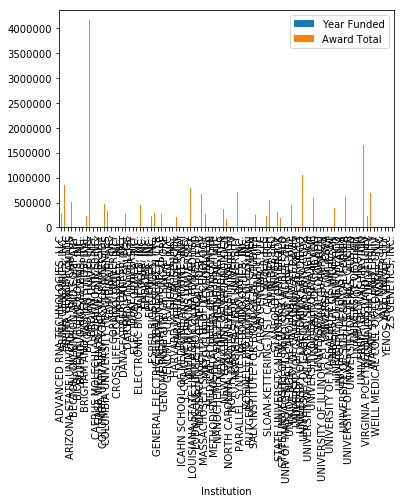

In [8]:
#plot a bar graph for amount of $ awarded per institution
##need to make this look better
techdev_totals = funding_group.sum(columns='Award Total')
my_plot = techdev_totals.plot(kind='bar')

In [9]:
#create a subset of table with only year funded, award total, and institution
yearspending = techdev[['Year Funded','Award Total']]
yearspending.head()

,Year Funded,Award Total
0,2012,0
1,2012,0
2,2012,0
3,2012,0
4,2012,0


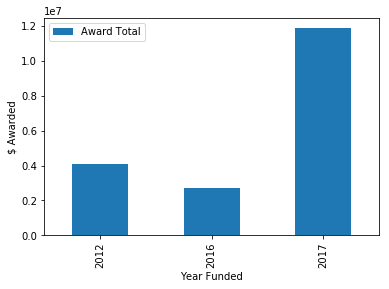

In [10]:
#plot a bar graph for the amount of $ awarded per year
yearspending_group = yearspending.groupby('Year Funded')
yearspending_group.size()
year_totals = yearspending_group.sum(columns='Award Total')
my_plot = year_totals.plot(kind='bar')
my_plot.set_xlabel("Year Funded")
my_plot.set_ylabel("$ Awarded")